In [14]:
# Load libraries

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(123)


In [3]:
# File system manangement
import os

# Load data fcn
def load_credit_data(data_path):
    csv_path = os.path.join("data", data_path)
    return pd.read_csv(csv_path)

In [7]:
# Load training data
training_df = load_credit_data ("training_top.csv")
print (training_df.shape)

(307511, 267)


In [8]:
# Load testing data
testing_df = load_credit_data ("testing_top.csv")
print (testing_df.shape)

(48744, 267)


In [19]:
# Load labels data
labels_df = load_credit_data ("y_labels.csv")
print (labels_df.shape)

y_train = labels_df['TARGET'].copy()

(307511, 1)


In [37]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(267, input_dim=267, activation='relu'))
    # model.add(layers.Dense(130, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
history = keras_model.fit(training_df, y_train, epochs=10, batch_size=1000, verbose=2)


Epoch 1/10
 - 4s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 2/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 3/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 4/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 5/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 6/10
 - 4s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 7/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 8/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 9/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012
Epoch 10/10
 - 3s - loss: 1.3012 - acc: 0.9193 - binary_crossentropy: 1.3012


In [39]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict_proba(training_df)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_pred_keras)

In [40]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print (auc_keras)

0.5


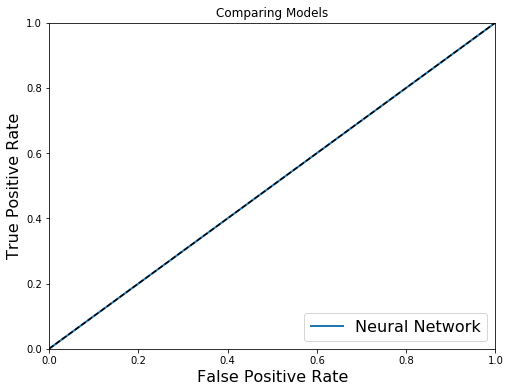

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_keras, tpr_keras, "Neural Network")
plt.legend(loc="lower right", fontsize=16)
plt.title("Comparing Models")
plt.show()    

In [25]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

KeyError: 'val_loss'